# Assignment 07 , Question :- 02, Clustering

In [1]:
# important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Data Loading 

In [2]:
EastWestAirlines = pd.read_csv(r"D:\Data Science Material\Assignments\clustering\EastWestAirlines.csv")

In [3]:
EastWestAirlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [73]:
# making original data safe
EastWest_Airlines = EastWestAirlines.copy()

In [74]:
EastWest_Airlines.shape

(3999, 12)

In [75]:
EastWest_Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [76]:
EastWest_Airlines.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [77]:
EastWest_Airlines.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


# Data Analysis 

In [78]:
# shoing null valuees
EastWest_Airlines.isna().sum()   # no. null values

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [79]:
# duplicate values
EastWest_Airlines.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3994    False
3995    False
3996    False
3997    False
3998    False
Length: 3999, dtype: bool

In [80]:
# data types of each cols
EastWest_Airlines.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [81]:
# Renaming cols
EastWest_Airlines = EastWest_Airlines.rename({'ID#':'ID'},axis=1)

In [82]:
EastWest_Airlines.head(1)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0


In [83]:
# showing values in decending order
EastWest_Airlines.sort_values('Balance',ascending=False).head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
275,279,1704838,0,1,1,1,17108,32,4823,23,7283,1
220,224,1302051,2706,5,1,1,90653,32,3050,7,7467,1
488,494,1199220,2919,1,1,1,3800,19,3300,18,8023,1
481,487,1125076,0,3,1,1,23046,14,0,0,8107,0
466,472,1113394,2015,5,1,1,60883,26,2600,9,8228,1


In [84]:
# showing values in decending order
EastWest_Airlines.sort_values('Qual_miles',ascending=False).head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
1177,1189,32214,11148,3,1,1,12717,10,0,0,5576,1
1220,1233,40965,10098,1,1,1,9850,11,1850,6,5429,1
2605,2624,41152,10074,1,1,1,3250,19,0,0,2669,0
901,912,172110,9325,5,1,1,21382,23,950,3,5944,1
896,907,218763,8753,1,1,1,11650,6,1150,3,5975,0


In [85]:
# showing values in decending order
EastWest_Airlines.sort_values('Bonus_miles',ascending=False).head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
534,540,267404,0,5,1,1,263685,51,3000,6,6584,1
190,194,123516,0,5,1,1,240544,31,500,2,7507,1
380,385,377252,0,5,1,1,230629,30,6393,13,6996,1
2364,2382,108081,0,5,1,5,217006,24,0,0,3567,1
151,154,930410,0,5,1,1,211284,18,2250,6,7640,1


In [86]:
# showing values in decending order
EastWest_Airlines.sort_values('Bonus_trans',ascending=False).head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3583,3606,160114,500,1,1,1,71954,86,30817,53,1373,1
3594,3617,27619,0,4,1,1,83726,68,14050,46,1325,1
3249,3272,51680,0,4,1,1,54926,65,3088,8,2112,1
2015,2032,53232,888,4,1,1,80696,65,22100,45,3831,1
3235,3257,287033,0,1,1,1,26161,58,12873,53,2272,1


In [87]:
# showing values in decending order
EastWest_Airlines.sort_values('Flight_miles_12mo',ascending=False).head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3583,3606,160114,500,1,1,1,71954,86,30817,53,1373,1
2015,2032,53232,888,4,1,1,80696,65,22100,45,3831,1
1885,1902,147596,0,1,1,1,19175,19,16675,18,4076,1
3463,3486,119214,0,1,1,1,19633,23,15533,17,1041,1
3594,3617,27619,0,4,1,1,83726,68,14050,46,1325,1


In [88]:
# showing values in decending order
EastWest_Airlines.sort_values('Flight_trans_12',ascending=False).head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3583,3606,160114,500,1,1,1,71954,86,30817,53,1373,1
3235,3257,287033,0,1,1,1,26161,58,12873,53,2272,1
3594,3617,27619,0,4,1,1,83726,68,14050,46,1325,1
2015,2032,53232,888,4,1,1,80696,65,22100,45,3831,1
1676,1692,51304,1362,1,1,1,11611,40,10075,36,4708,1


In [89]:
# showing values in decending order 
EastWest_Airlines.sort_values('Days_since_enroll',ascending=False).head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
394,400,114713,0,1,1,1,7142,18,0,0,8296,0
415,421,109087,0,2,1,1,10462,16,0,0,8296,1
408,414,5581,0,1,1,1,0,0,0,0,8296,0
409,415,10732,0,1,1,1,1296,6,0,0,8296,0
410,416,620498,0,5,1,1,25395,53,1750,14,8296,1


In [90]:
# showing values in decending order 
EastWest_Airlines.sort_values('Award?',ascending=False).head(30)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
1999,2016,327126,1452,5,1,1,97997,25,350,3,4440,1
1503,1518,507371,0,4,1,1,51765,18,450,1,4770,1
1518,1533,70464,0,1,1,1,4000,4,1000,2,4889,1
1517,1532,2793,0,1,1,1,8000,3,0,0,4588,1
1516,1531,118415,2329,1,1,1,4475,10,100,1,4545,1
3167,3189,17863,0,1,1,1,0,0,0,0,2028,1
1513,1528,124775,1704,1,1,1,11564,8,700,2,4847,1
1512,1527,4779,0,1,1,1,600,2,0,0,4926,1
3168,3190,28443,0,4,1,1,53065,18,150,1,2462,1
3169,3191,15655,0,1,1,1,2807,12,957,4,2476,1


In [91]:
# seen cols wise NAN values
EastWest_Airlines.Balance.isna().sum()

0

In [92]:
# seen cols wise NAN values
EastWest_Airlines.Qual_miles.isna().sum()

0

In [93]:
# seen cols wise NAN values
EastWest_Airlines.Bonus_miles.isna().sum()

0

In [94]:
# seen cols wise NAN values
EastWest_Airlines.Bonus_trans.isna().sum()

0

In [95]:
# seen cols wise NAN values
EastWest_Airlines.Flight_miles_12mo.isna().sum()

0

In [96]:
# seen cols wise NAN values
EastWest_Airlines.Days_since_enroll.isna().sum()

0

In [97]:
EastWest_Airlines.head(1)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0


# Visualization 

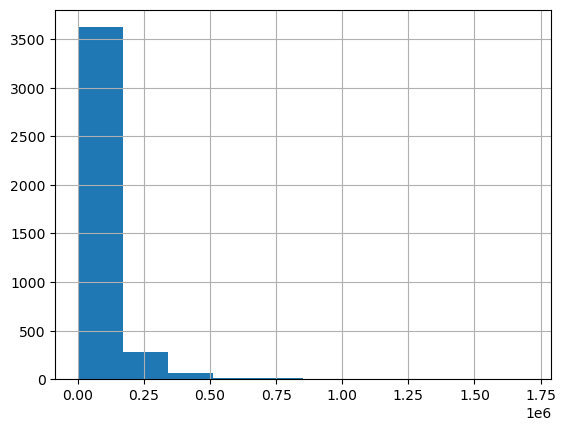

In [98]:
# histogram
EastWest_Airlines.Balance.hist()
plt.show()

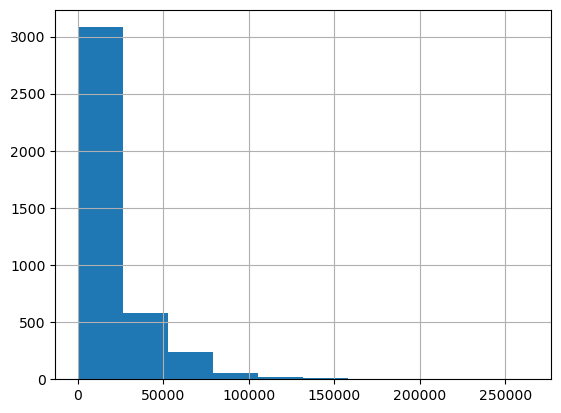

In [99]:
# histogram
EastWest_Airlines.Bonus_miles.hist()
plt.show()


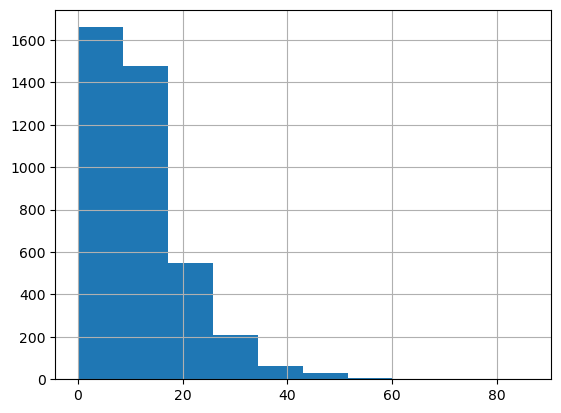

In [100]:
# histogram
EastWest_Airlines.Bonus_trans.hist()
plt.show()

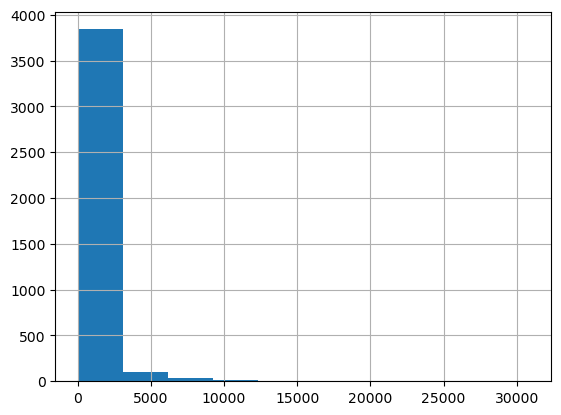

In [101]:
# histogram
EastWest_Airlines.Flight_miles_12mo.hist()
plt.show()

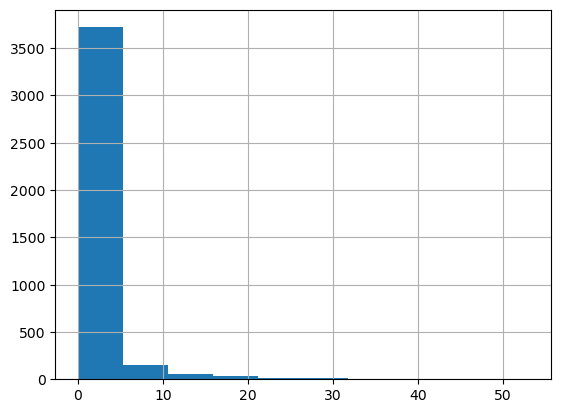

In [102]:
# histogram
EastWest_Airlines.Flight_trans_12.hist()
plt.show()

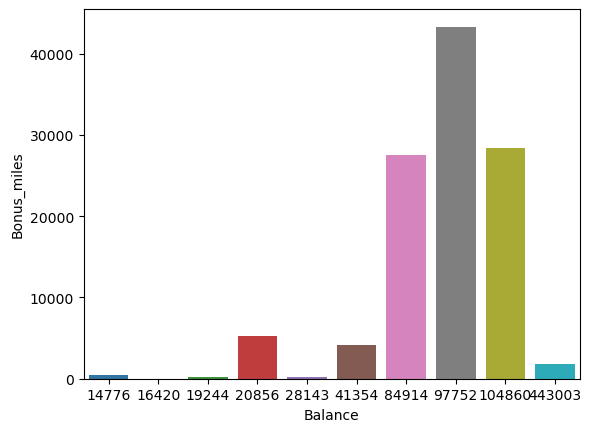

In [103]:
# barplot
sns.barplot(x='Balance',y='Bonus_miles',data=EastWest_Airlines.head(10))
plt.show()

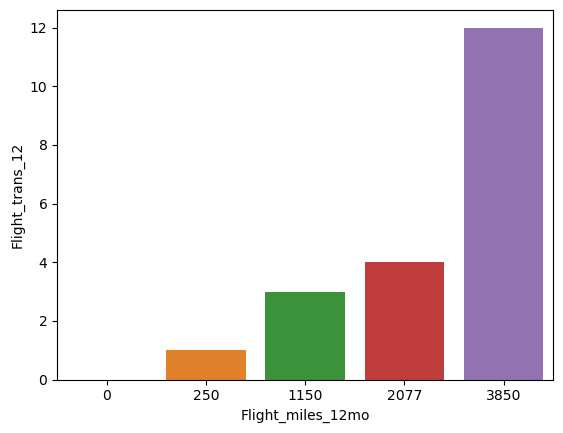

In [104]:
# barplot
sns.barplot(x='Flight_miles_12mo',y='Flight_trans_12',data=EastWest_Airlines.head(10))
plt.show()

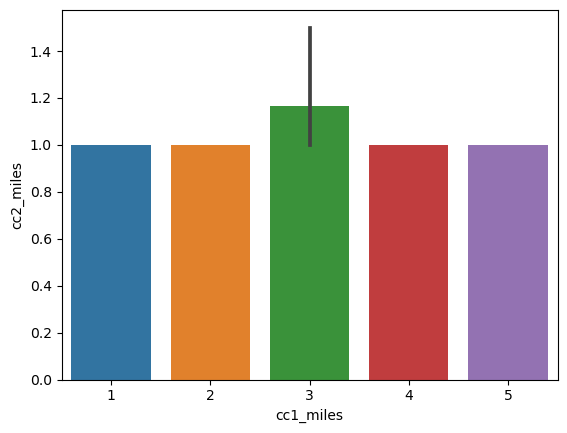

In [105]:
# barplot
sns.barplot(x='cc1_miles',y='cc2_miles',data=EastWest_Airlines.head(30))
plt.show()

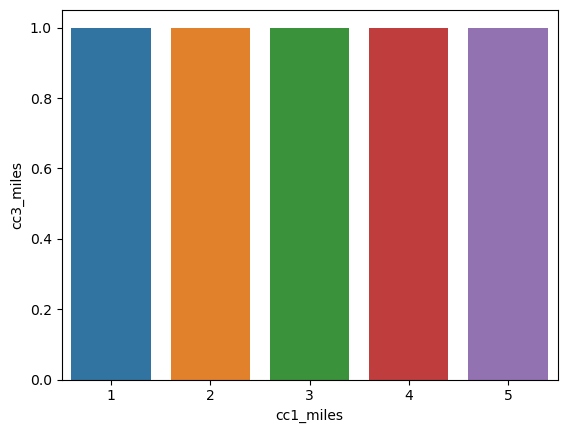

In [106]:
# barplot
sns.barplot(x='cc1_miles',y='cc3_miles',data=EastWest_Airlines.head(30))
plt.show()

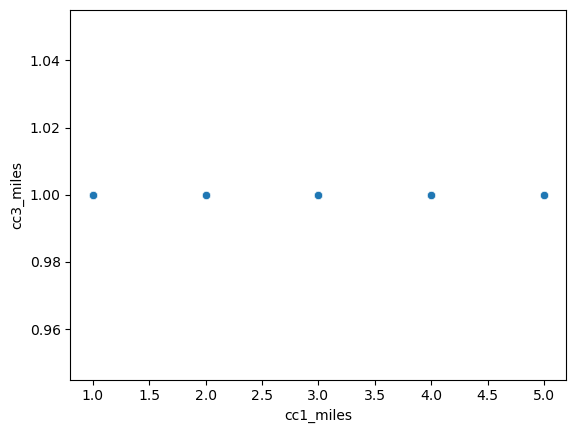

In [107]:
# scatter plot
sns.scatterplot(x='cc1_miles',y='cc3_miles',data=EastWest_Airlines.head(30))
plt.show()

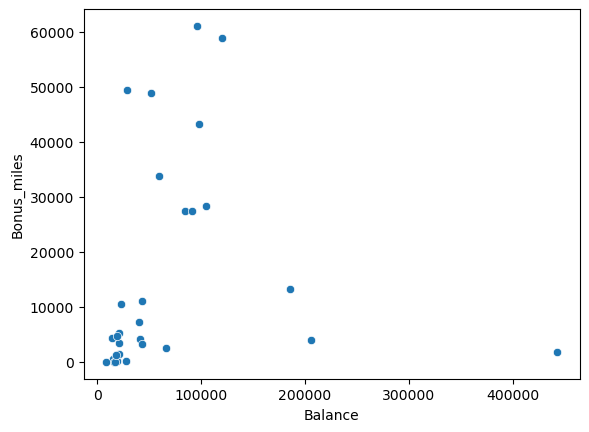

In [108]:
# scatter plot
sns.scatterplot(x='Balance',y='Bonus_miles',data=EastWest_Airlines.head(30))
plt.show()

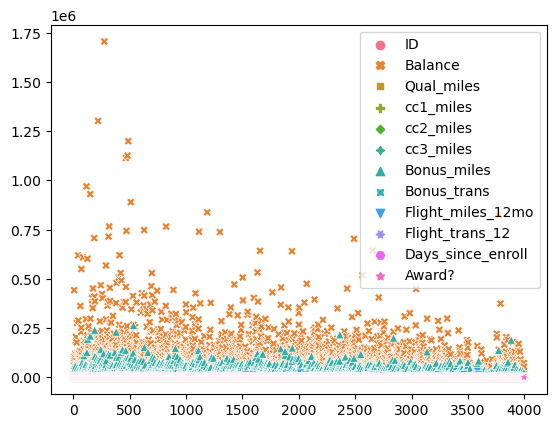

In [109]:
# scatter plot  

sns.scatterplot(data = EastWest_Airlines)
plt.show()

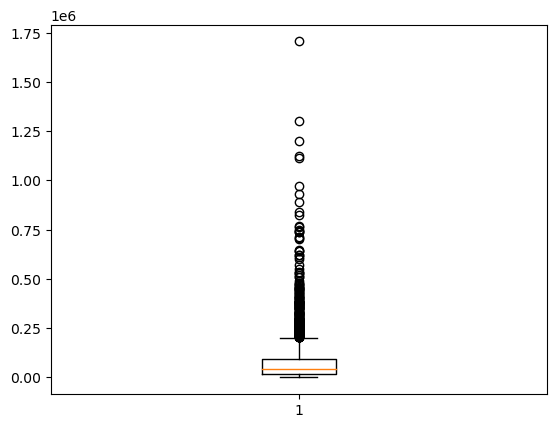

In [110]:
# box plot
plt.boxplot(x = 'Balance',data = EastWest_Airlines)
plt.show()

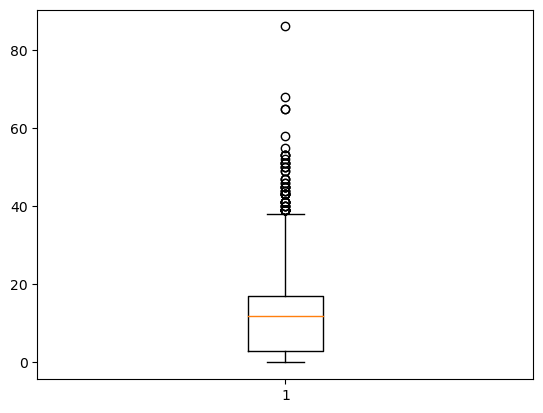

In [111]:
# box plot
plt.boxplot(x = 'Bonus_trans',data = EastWest_Airlines)
plt.show()

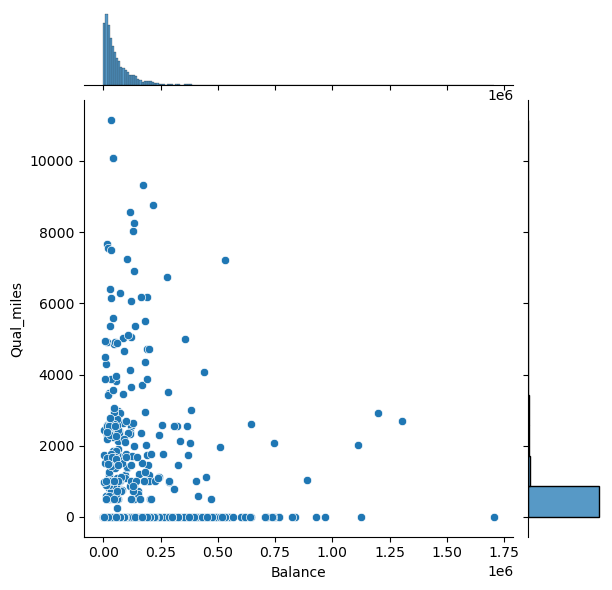

In [145]:
# jointplot
sns.jointplot(x='Balance',y='Qual_miles',data = EastWest_Airlines)
plt.show()

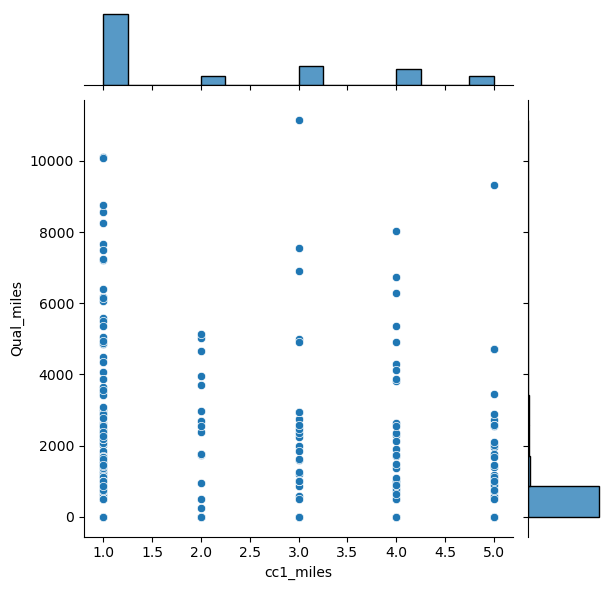

In [148]:
# jointplot
sns.jointplot(x='cc1_miles',y='Qual_miles',data = EastWest_Airlines)
plt.show()

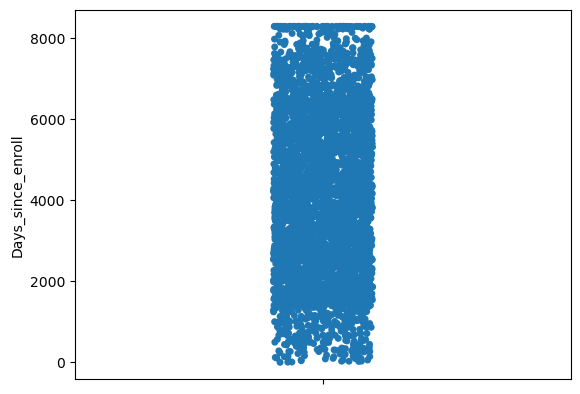

In [114]:
# stripplot
sns.stripplot(y= 'Days_since_enroll', data=EastWest_Airlines,jitter=True)
plt.show()

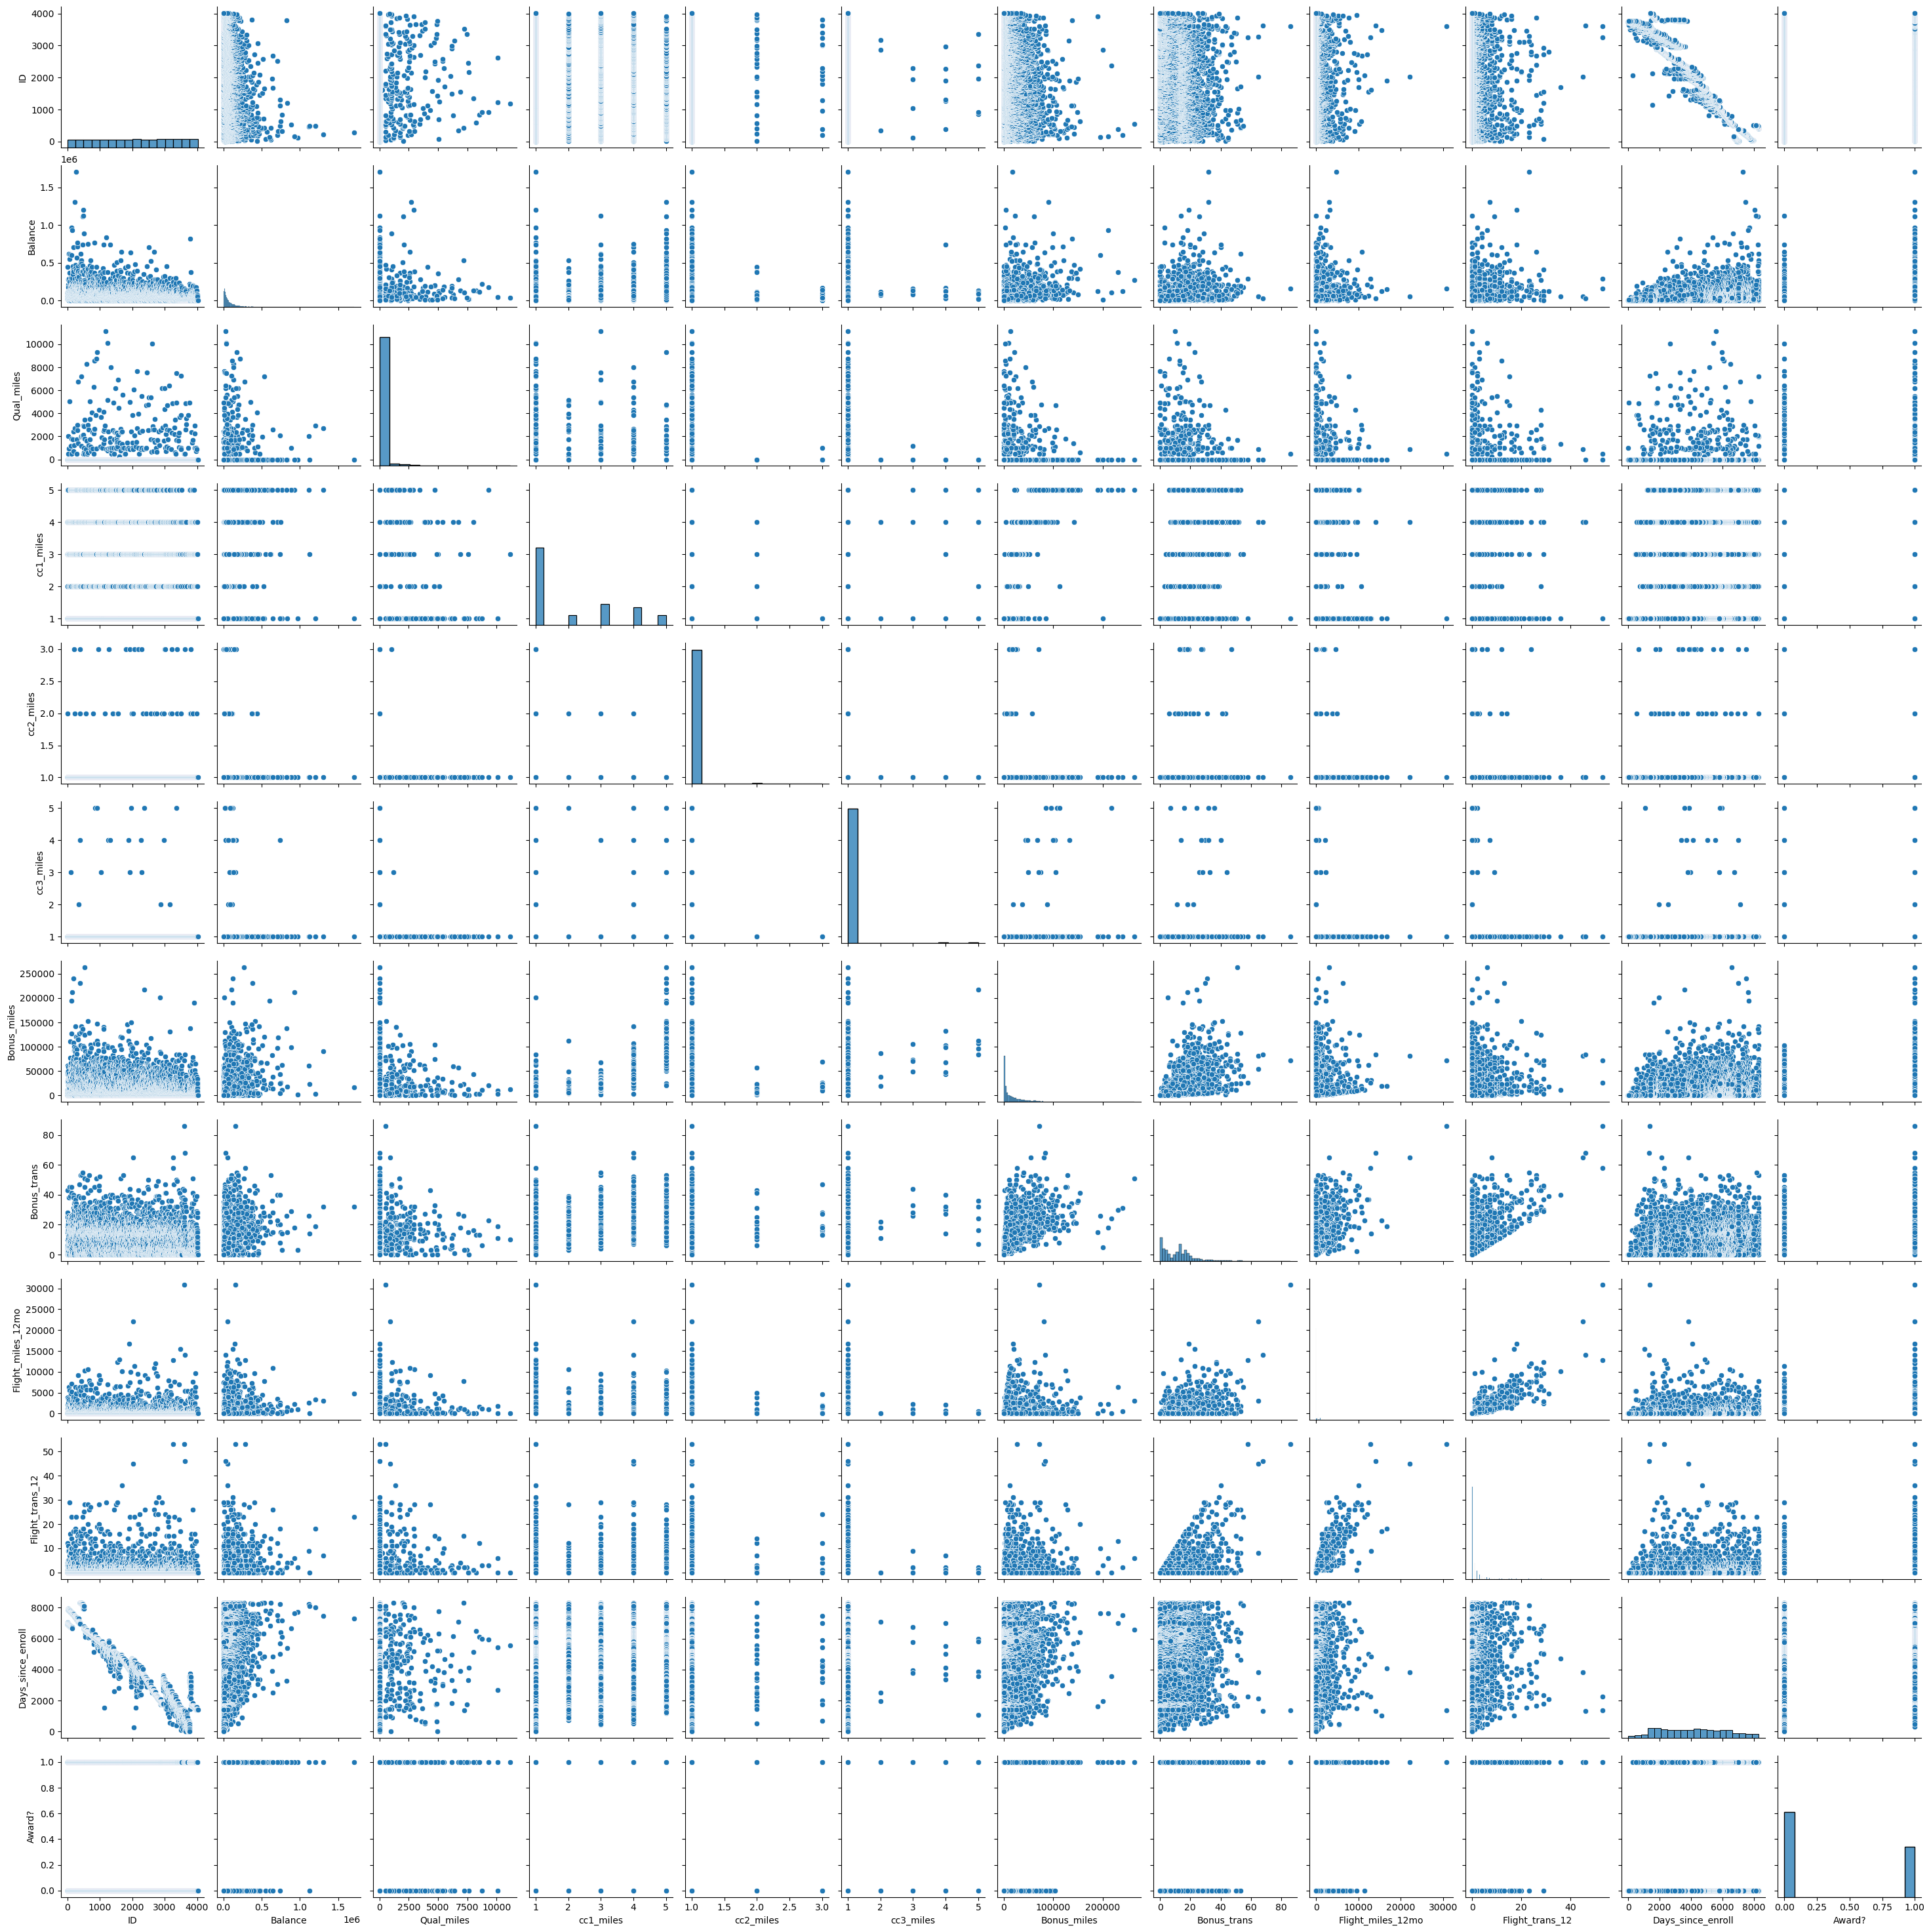

In [115]:
sns.pairplot(EastWest_Airlines.dropna())
plt.show()

# Data cleaning

In [116]:
# dummies value
cc2_miles = pd.get_dummies(EastWest_Airlines['cc2_miles'],drop_first=True)

In [117]:
# droping unused cols
EastWest_Airlines.drop(['cc2_miles'],inplace=True,axis= 1)

In [118]:
# droping unused cols
EastWest_Airlines.drop(['cc3_miles'],inplace=True,axis= 1)

In [120]:
# concatinating the cols with data set 
EastWest_Airlines = pd.concat([EastWest_Airlines,cc2_miles],axis=1)

In [122]:
# droping unused cols
EastWest_Airlines.drop(['ID'],inplace=True,axis=1)

In [124]:
EastWest_Airlines.head(2)

,Balance,Qual_miles,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,2,3
0,28143,0,1,174,1,0,0,7000,0,0,0
1,19244,0,1,215,2,0,0,6968,0,0,0


In [125]:
# seeing NA values
EastWest_Airlines.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
2                    0
3                    0
dtype: int64

In [126]:
# making dataset in arrays form
array = EastWest_Airlines.values

In [127]:
array

array([[28143,     0,     1, ...,     0,     0,     0],
       [19244,     0,     1, ...,     0,     0,     0],
       [41354,     0,     1, ...,     0,     0,     0],
       ...,
       [73597,     0,     3, ...,     1,     0,     0],
       [54899,     0,     1, ...,     0,     0,     0],
       [ 3016,     0,     1, ...,     0,     0,     0]], dtype=int64)

In [129]:
# applying standard scaler abd fitting the model
stand_scaler = StandardScaler().fit(array)

In [130]:
# after applying standard scaler abd fitting the model we transfer it 
transfer = stand_scaler.transform(array)

In [131]:
transfer

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -8.39709511e-02, -6.13600867e-02],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -8.39709511e-02, -6.13600867e-02],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -8.39709511e-02, -6.13600867e-02],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
         1.30391816e+00, -8.39709511e-02, -6.13600867e-02],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -8.39709511e-02, -6.13600867e-02],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -8.39709511e-02, -6.13600867e-02]])

In [132]:
# we using DBSCAN algorithm and fitting the model of transfer data
dbscan = DBSCAN(eps=0.8,min_samples=12)
dbscan.fit(transfer)

DBSCAN(eps=0.8, min_samples=12)

In [137]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [140]:
Cluster = pd.DataFrame(dbscan.labels_,columns=['Cluster'])

In [143]:
Cluster

,Cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,1
3997,0


In [149]:
# for the airlines data to obtain optimum number of clusters in cluster cols
pd.concat([EastWest_Airlines,Cluster],axis=1)

,Balance,Qual_miles,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,2,3,Cluster
0,28143,0,1,174,1,0,0,7000,0,0,0,0
1,19244,0,1,215,2,0,0,6968,0,0,0,0
2,41354,0,1,4123,4,0,0,7034,0,0,0,0
3,14776,0,1,500,1,0,0,6952,0,0,0,0
4,97752,0,4,43300,26,2077,4,6935,1,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,8525,4,200,1,1403,1,0,0,1
3995,64385,0,1,981,5,0,0,1395,1,0,0,1
3996,73597,0,3,25447,8,0,0,1402,1,0,0,1
3997,54899,0,1,500,1,500,1,1401,0,0,0,0
